Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



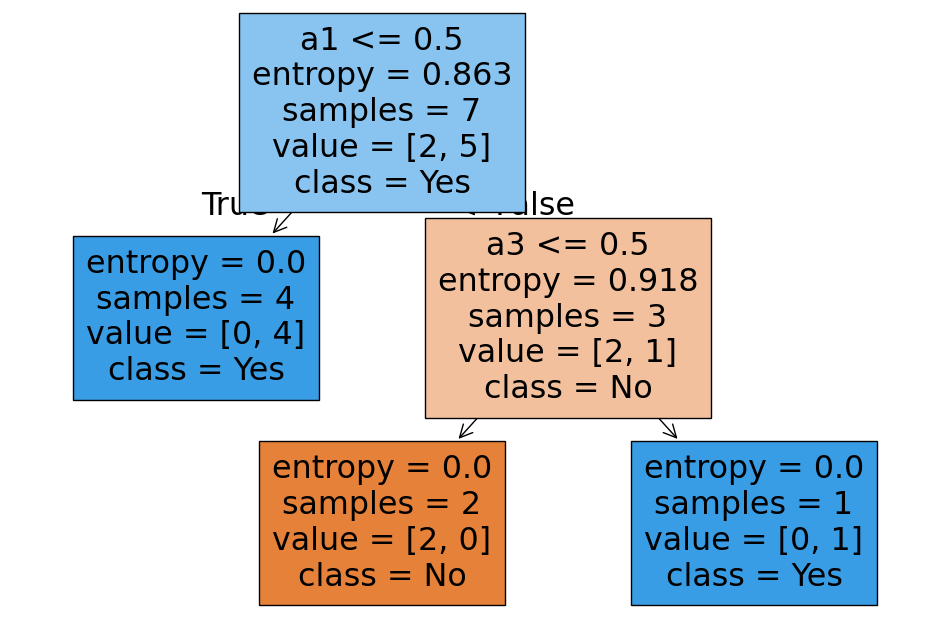

In [ ]:
# -*- coding: utf-8 -*-
"""Decision_Tree.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1RXDK8CR1doVCMHgkaXpJsNLAvzOIaXdd
"""

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()



IRIS Dataset Decision Tree Classifier
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



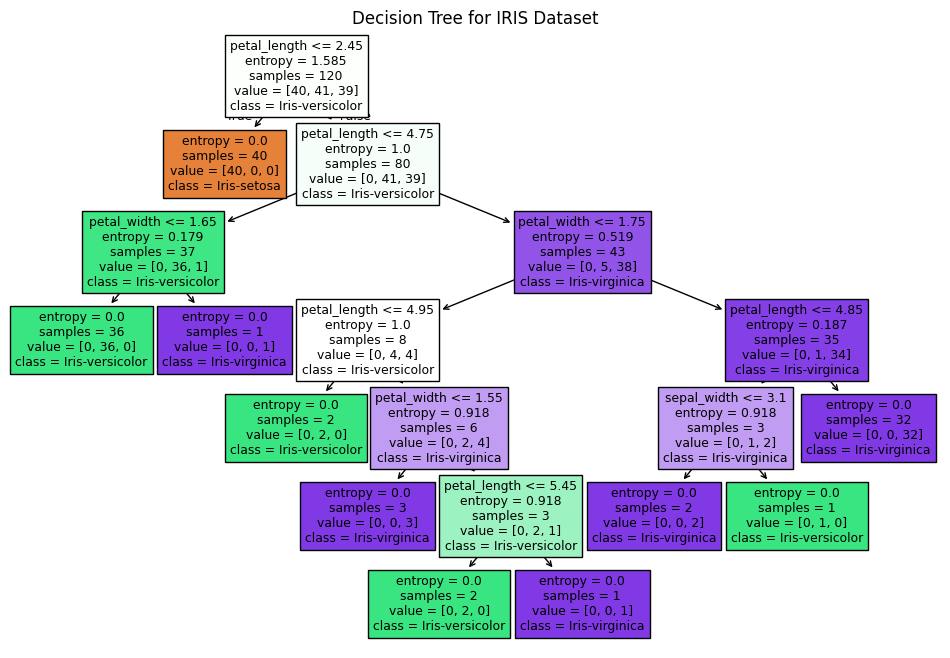

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the iris dataset (make sure iris.csv is in the working directory)
iris = pd.read_csv("iris.csv")
# Assuming the last column is the target (species) and the rest are features.
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf_iris = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_iris.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_iris = clf_iris.predict(X_test)
accuracy_iris = accuracy_score(y_test, y_pred_iris)
conf_matrix_iris = confusion_matrix(y_test, y_pred_iris)

print("IRIS Dataset Decision Tree Classifier")
print("Accuracy:", accuracy_iris)
print("Confusion Matrix:\n", conf_matrix_iris)
print("Classification Report:\n", classification_report(y_test, y_pred_iris))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_iris, filled=True, feature_names=X.columns, class_names=clf_iris.classes_)
plt.title("Decision Tree for IRIS Dataset")
plt.show()


Drug Dataset Decision Tree Classifier
Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



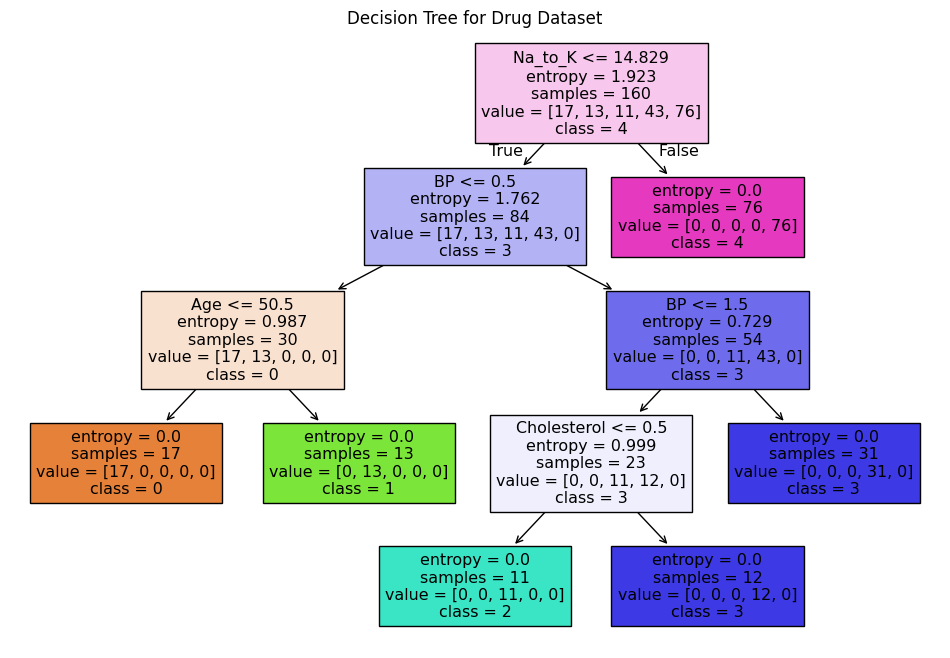

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the drug dataset (make sure drug.csv is in the working directory)
drug = pd.read_csv("drug.csv")

# Since the target column is 'Drug', drop it from the features
X_drug = drug.drop('Drug', axis=1)
y_drug = drug['Drug']

# If there are categorical features, perform necessary encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encode features that are categorical
for col in X_drug.select_dtypes(include='object').columns:
    X_drug[col] = le.fit_transform(X_drug[col])
# Also encode the target variable if necessary
y_drug = le.fit_transform(y_drug)

# Split the data (80% training, 20% testing)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier using entropy criterion
clf_drug = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_drug.fit(X_train_d, y_train_d)

# Make predictions and evaluate the model
y_pred_drug = clf_drug.predict(X_test_d)
accuracy_drug = accuracy_score(y_test_d, y_pred_drug)
conf_matrix_drug = confusion_matrix(y_test_d, y_pred_drug)

print("Drug Dataset Decision Tree Classifier")
print("Accuracy:", accuracy_drug)
print("Confusion Matrix:\n", conf_matrix_drug)
print("Classification Report:\n", classification_report(y_test_d, y_pred_drug))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_drug, filled=True, feature_names=X_drug.columns,
          class_names=[str(cls) for cls in clf_drug.classes_])
plt.title("Decision Tree for Drug Dataset")
plt.show()


Petrol Consumption Regression Tree
Mean Absolute Error (MAE): 94.3
Mean Squared Error (MSE): 17347.7
Root Mean Squared Error (RMSE): 131.7106677532234


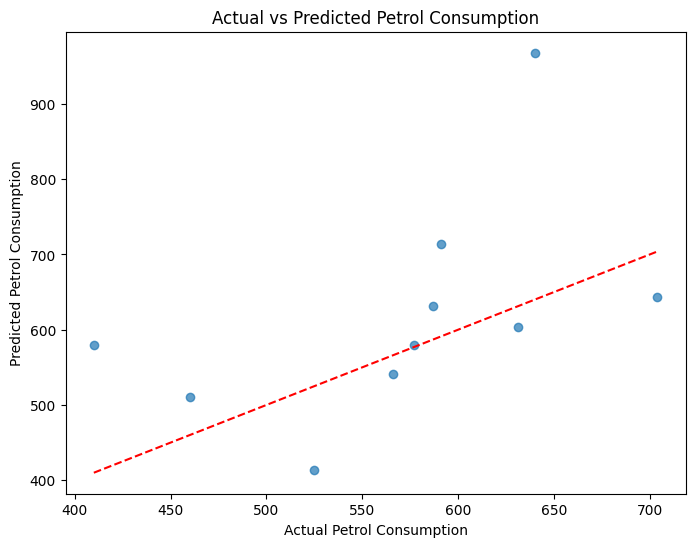

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the petrol consumption dataset (make sure petrol_consumption.csv is in the working directory)
petrol = pd.read_csv("petrol_consumption.csv")

# The dataset has a target variable named 'Petrol_Consumption'
# and the remaining columns are features.
X_petrol = petrol.drop('Petrol_Consumption', axis=1)
y_petrol = petrol['Petrol_Consumption']

# If necessary, handle categorical variables here (e.g., using dummy encoding)
# X_petrol = pd.get_dummies(X_petrol)

# Split the data (80% training, 20% testing)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_petrol, y_petrol, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_p, y_train_p)

# Make predictions
y_pred_p = regressor.predict(X_test_p)

# Evaluate the regression model
mae = mean_absolute_error(y_test_p, y_pred_p)
mse = mean_squared_error(y_test_p, y_pred_p)
rmse = np.sqrt(mse)

print("Petrol Consumption Regression Tree")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Optional: Plotting predicted vs actual values-*/
plt.figure(figsize=(8, 6))
plt.scatter(y_test_p, y_pred_p, alpha=0.7)
plt.xlabel("Actual Petrol Consumption")
plt.ylabel("Predicted Petrol Consumption")
plt.title("Actual vs Predicted Petrol Consumption")
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], 'r--')
plt.show()
